In [18]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import Diagonal

n_qubits = 3          
N = 2**n_qubits
L = 1.0              
c = 1.0              
t = 1/8              
x = 1.0               


j = np.arange(N) #from 0 to N-1
phi = (2*np.pi/L)
k = np.where(j < N/2, j, (j - N))

unitary_diag = np.exp(-1j * phi * c * k *t)

qc = QuantumCircuit(n_qubits)

evolution_gate = Diagonal(unitary_diag)

qc.append(evolution_gate, range(n_qubits))

print("Diagonal Operator Entries:")
print(np.round(unitary_diag, 3))

print("\nCircuit Diagram:")
print(qc)

Diagonal Operator Entries:
[ 1.   +0.j     0.707-0.707j  0.   -1.j    -0.707-0.707j -1.   +0.j
 -0.707+0.707j  0.   +1.j     0.707+0.707j]

Circuit Diagram:
     ┌───────────┐
q_0: ┤0          ├
     │           │
q_1: ┤1 Diagonal ├
     │           │
q_2: ┤2          ├
     └───────────┘


/tmp/ipykernel_89977/3502425295.py:21: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  evolution_gate = Diagonal(unitary_diag)


[0. 1. 2. 3. 4. 5. 6. 7.]


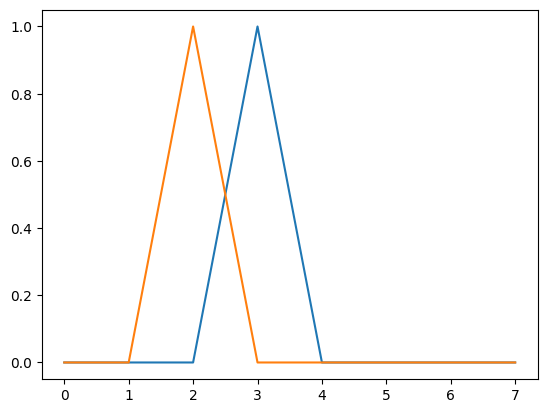

In [19]:

from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import QFTGate, StatePreparation
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt



qcQFT = QFTGate(n_qubits)
qcIQFT = QFTGate(n_qubits).inverse()


x = np.linspace(0,2**n_qubits-1,2**n_qubits)
print(x)
state = np.zeros(2**n_qubits)
state[3] = 1
state = state/np.linalg.norm(state,2)

stateprep = StatePreparation(state)
qc = QuantumCircuit(n_qubits)
qc.compose(stateprep, inplace=True)
qc.compose(qcQFT, inplace=True)

qc.append(evolution_gate, range(n_qubits))
qc.compose(qcIQFT, inplace=True)
qc.draw()

final_state = Statevector.from_instruction(qc)
plt.plot(x,state)
plt.plot(x,final_state)

